In [18]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

KeyboardInterrupt: 

In [ ]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')

In [ ]:
df['month_num'] = pd.to_datetime(df['job_posted_month'], format='%B').dt.month

In [ ]:
df.sort_values('month_num', inplace=True)
df.set_index('job_posted_month', inplace=True)

In [ ]:
df_pivot = df.pivot_table(
    index='job_posted_month',
    columns='job_title_short',
    aggfunc='size'
)

<Axes: xlabel='job_posted_month'>

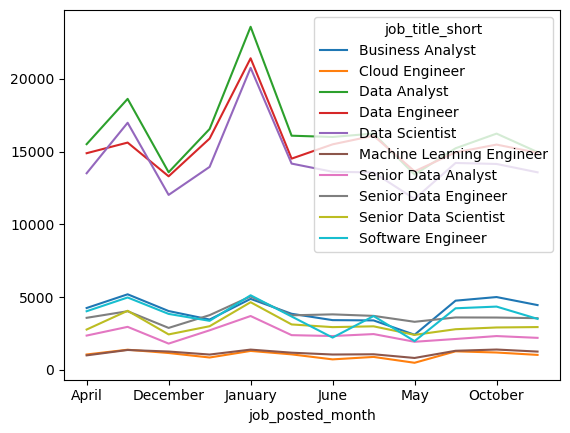

In [ ]:
df_pivot.plot(kind='line')

In [ ]:
top_3 = df['job_title_short'].value_counts().head(3)
top_3

job_title_short
Data Analyst      196075
Data Engineer     186241
Data Scientist    172286
Name: count, dtype: int64

In [ ]:
top_3 = top_3.index.to_list()
top_3

['Data Analyst', 'Data Engineer', 'Data Scientist']

<Axes: xlabel='job_posted_month'>

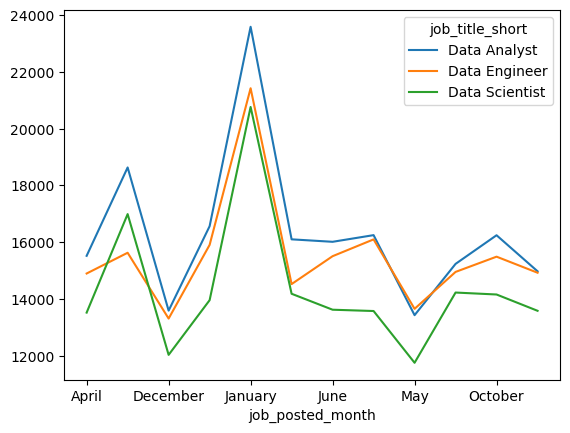

In [ ]:
df_pivot[top_3].plot(kind='line')


In [ ]:
df_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,4246,1051,15514,14891,13513,990,2351,3572,2766,4025
August,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970
December,4038,1152,13583,13303,12024,1254,1799,2878,2431,3841
February,3454,843,16558,15899,13951,1046,2713,3756,2994,3364
January,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122
July,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663
June,3413,714,16008,15501,13615,1048,2319,3809,2932,2213
March,3393,883,16243,16093,13569,1065,2454,3705,2987,3692
May,2408,480,13423,13646,11745,811,1925,3298,2399,1969


In [ ]:
software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

In [ ]:
df_software_merged = df_pivot.merge(software_pivot, on='job_posted_month')
top_5 = (df_software_merged
         # Adds up total jobs
         .sum()
         # Sorts the jobs in order of most posted jobs
         .sort_values(ascending=False)
         # Returns just the top 5
         .head(5)
         # Pulls the index (job titles) not the values (number of jobs posted)
         .index
         # Transforms the index into a list of job titles so we can use in analysis
         .to_list())

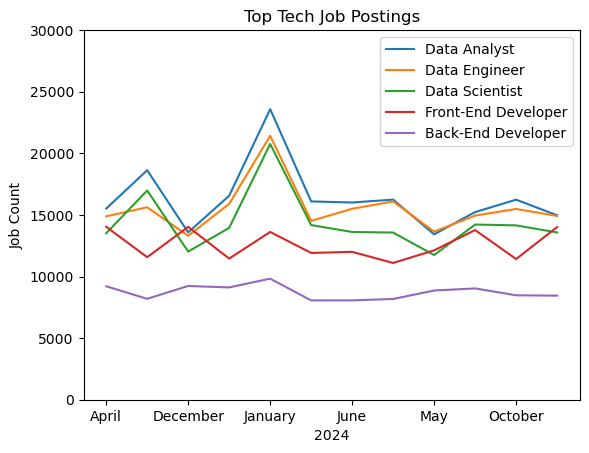

In [ ]:
df_software_merged[top_5].plot(kind='line')
plt.title('Top Tech Job Postings')
plt.xlabel('2024')
plt.ylabel('Job Count')
# Specifies the range of the y axis
plt.ylim(0, 30000)
plt.legend()
plt.show()

# Practice Problems

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [12]:
non_remote_jobs = df[df['job_work_from_home']== False] 
remote_jobs = df[df['job_work_from_home']== True] 

In [3]:
non_remote_jobs.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [4]:
salary_jobs = df.dropna(subset=['salary_year_avg'])

In [7]:
salary_jobs_pivot = salary_jobs.pivot_table(
    index='job_title_short',
    values='salary_year_avg',
    aggfunc='median'
)

In [8]:
salary_jobs_pivot

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [13]:
non_remote_jobs_pivot = non_remote_jobs.pivot_table(
    index='job_title_short',
    values='salary_year_avg',
    aggfunc='median'
)
remote_jobs_pivot = remote_jobs.pivot_table(
    index='job_title_short',
    values='salary_year_avg',
    aggfunc='median'
)

In [ ]:
non_remote_jobs_pivot

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,89100.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,125000.0
Machine Learning Engineer,104668.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,152650.0


In [19]:
salary_merge_pivot = non_remote_jobs_pivot.merge(salary_jobs_pivot, on='job_title_short')

In [20]:
salary_merge_pivot = salary_merge_pivot.merge(remote_jobs_pivot, on='job_title_short')

In [21]:
salary_merge_pivot

,salary_year_avg_x,salary_year_avg_y,salary_year_avg
job_title_short,,,
Business Analyst,85000.0,85000.0,90000.0
Cloud Engineer,89100.0,90000.0,140000.0
Data Analyst,90000.0,90000.0,86750.0
Data Engineer,125000.0,125000.0,130000.0
Data Scientist,125000.0,127500.0,136000.0
Machine Learning Engineer,104668.0,106415.0,127500.0
Senior Data Analyst,111175.0,111175.0,105000.0
Senior Data Engineer,147500.0,147500.0,145000.0
Senior Data Scientist,152650.0,155500.0,160000.0


In [22]:
remote_jobs_pivot

,salary_year_avg
job_title_short,
Business Analyst,90000.0
Cloud Engineer,140000.0
Data Analyst,86750.0
Data Engineer,130000.0
Data Scientist,136000.0
Machine Learning Engineer,127500.0
Senior Data Analyst,105000.0
Senior Data Engineer,145000.0
Senior Data Scientist,160000.0


In [27]:
salary_merge_pivot.rename(columns={'salary_year_avg': 'Remote_Salary'}, inplace=True)


In [28]:
salary_merge_pivot.rename(columns={'salary_year_avg_x': 'Non_Remote_Salary'}, inplace=True)

In [30]:
salary_merge_pivot.drop(columns={'salary_year_avg_y'}, inplace=True)

In [39]:
salary_merge_pivot.reset_index()

,job_title_short,Non_Remote_Salary,Remote_Salary
0,Business Analyst,85000.0,90000.0
1,Cloud Engineer,89100.0,140000.0
2,Data Analyst,90000.0,86750.0
3,Data Engineer,125000.0,130000.0
4,Data Scientist,125000.0,136000.0
5,Machine Learning Engineer,104668.0,127500.0
6,Senior Data Analyst,111175.0,105000.0
7,Senior Data Engineer,147500.0,145000.0
8,Senior Data Scientist,152650.0,160000.0
9,Software Engineer,95000.0,125000.0


(0.0, 200000.0)

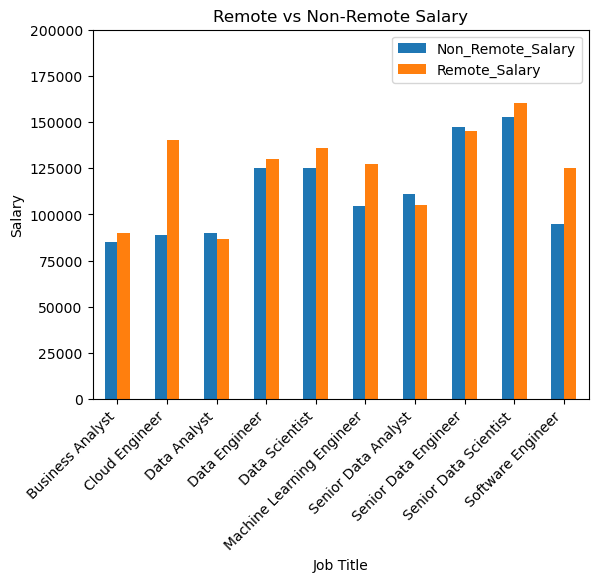

In [43]:
salary_merge_pivot.plot(kind='bar')
plt.xticks(ha='right', rotation=45)
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Remote vs Non-Remote Salary')
plt.ylim(0, 200000)

# Company and Remote Count


In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [6]:
df_company_salary = df.dropna(subset=['salary_year_avg', 'company_name'])

In [54]:
df_company_salary_pivot = df_company_salary.pivot_table(
    values='salary_year_avg',
    index='company_name',
    aggfunc='median'
)

In [18]:
df_company_salary_pivot = df_company_salary_pivot.sort_values('salary_year_avg', ascending=False)

In [ ]:
df_company_salary_pivot.reset_index(inplace=True)

In [29]:
df_company_salary_pivot.set_index('company_name', inplace=True)

In [30]:
df_company_salary_pivot

,salary_year_avg
company_name,
Capital One,53446416.0
Jobot,44187000.0
TikTok,43448621.5
Harnham,38717500.0
Booz Allen Hamilton,31698150.0
...,...
the darkstar group llc,25000.0
DrivenIQ,25000.0
Flipdish,24000.0


In [35]:
df_company['job_work_from_home'].value_counts()


job_work_from_home
False    716172
True      69551
Name: count, dtype: int64

In [43]:
df_company_work_from_home_pivot = df_company.pivot_table( index='company_name', values='job_work_from_home', aggfunc='sum'
)

In [45]:
df_company_work_from_home_pivot = df_company_work_from_home_pivot.sort_values('job_work_from_home', ascending=False)

In [55]:
company_salary_and_remote_pivot = df_company_salary_pivot.merge(df_company_work_from_home_pivot,on='company_name')

In [60]:
company_salary_and_remote_pivot = company_salary_and_remote_pivot.sort_values('job_work_from_home', ascending=False)

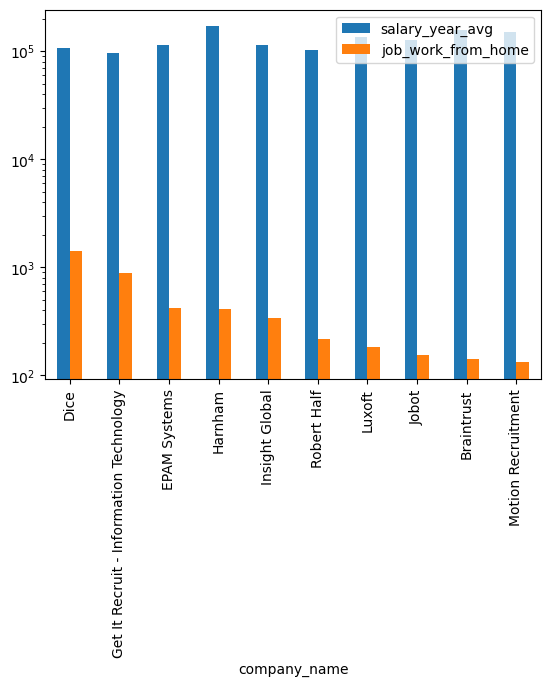

In [ ]:
company_salary_and_remote_pivot.head(10).plot(kind='bar')
# Makes the smaller value more distiguishable
plt.yscale('log')
